# Predicting Credit Card Churn

## *Data Exploration Analysis (EDA)*

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
customer_data = pd.read_csv('predicting-credit-card-churn-ReedBank.csv')

In [8]:
customer_data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [16]:
customer_data = customer_data.iloc[:, 1:-2]

In [17]:
print(f"Data Types:\n{customer_data.dtypes}")
print(f"\nRows and Columns:\n{customer_data.shape}")
print(f"\nColumn Names:\n{customer_data.columns}")
print(f"\nNull Values %:\n{customer_data.apply(lambda x: sum(x.isnull()) / len(customer_data))}")
print(f"\nUnknown Values %:\n{customer_data.apply(lambda x: sum(x=='Unknown') / len(customer_data))}")


Data Types:
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
dtype: object

Rows and Columns:
(10127, 17)

Column Names:
Index(['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_A

In [47]:
pd.crosstab(customer_data['Gender'], customer_data['Attrition_Flag'], margins = True, margins_name = "Total")

Attrition_Flag,Attrited Customer,Existing Customer,Total
Gender,,,
F,930,4428,5358
M,697,4072,4769
Total,1627,8500,10127


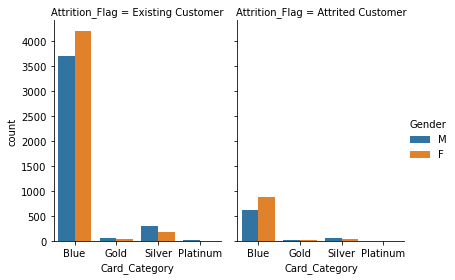

In [48]:
sns.catplot(x="Card_Category", hue="Gender", col="Attrition_Flag",
                data=customer_data, kind="count",
                height=4, aspect=.7);

The graph above gives us more information and yet not enough to know what to do. We need to shift to probabilities. Let's see information in probabilities:

Attrition_Flag,Attrited Customer,Existing Customer
Gender,,
F,0.173572,0.826428
M,0.146152,0.853848
% row,0.160660,0.839340


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

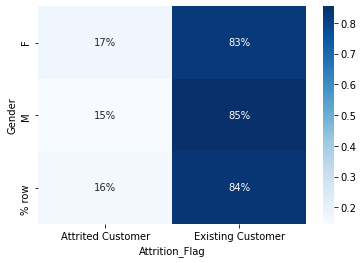

In [49]:
cross = pd.crosstab(customer_data['Gender'], 
            customer_data['Attrition_Flag'], 
            margins = True, 
            margins_name = "% row", 
            normalize='index')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

Attrition_Flag,Attrited Customer,Existing Customer,% columns
Gender,,,
F,0.571604,0.520941,0.529081
M,0.428396,0.479059,0.470919


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

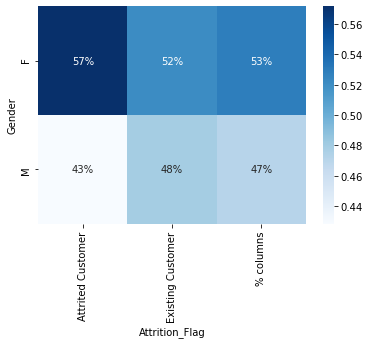

In [50]:
cross = pd.crosstab(customer_data['Gender'], 
            customer_data['Attrition_Flag'], 
            margins = True, 
            margins_name = "% columns", 
            normalize='columns')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

Attrition_Flag,Attrited Customer,Existing Customer,% all
Gender,,,
F,0.091834,0.437247,0.529081
M,0.068826,0.402093,0.470919
% all,0.160660,0.839340,1.000000


<AxesSubplot:xlabel='Attrition_Flag', ylabel='Gender'>

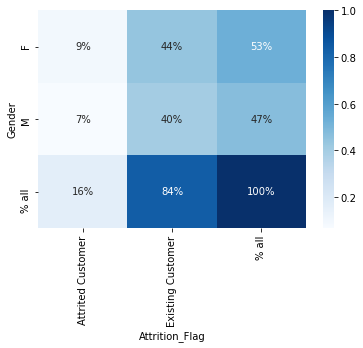

In [51]:
cross = pd.crosstab(customer_data['Gender'], 
            customer_data['Attrition_Flag'], 
            margins = True, 
            margins_name = "% all", 
            normalize='all')
display(cross)
sns.heatmap(cross, annot=True, fmt='.0%', cmap='Blues')

## Data Manipulation ##

In [54]:
# list of features name that are int64, object, and float64
s = (customer_data.dtypes == 'object')
cat_cols = list(s[s].index)
print(f"{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (customer_data.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")

s = (customer_data.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"\n{len(int64_cols)} int features:\n{int64_cols}")
del s

6 Categorical features:
['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

7 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']

10 int features:
['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']


In [55]:
s = (customer_data.dtypes == np.number)
num_cols = list(s[s].index)
print(f"\n{len(num_cols)} numpy.number features::\n{num_cols}")
del s


7 numpy.number features::
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']


In [56]:
customer_data[cat_cols].describe()

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [57]:
print(f'Memory Usage as Object type:\n{customer_data[cat_cols].memory_usage()}')
customer_data[cat_cols] = customer_data[cat_cols].astype('category')
print(f'\nMemory Usage as Category type:\n{customer_data[cat_cols].memory_usage()}')


Memory Usage as Object type:
Index                128
Attrition_Flag     81016
Gender             81016
Education_Level    81016
Marital_Status     81016
Income_Category    81016
Card_Category      81016
dtype: int64

Memory Usage as Category type:
Index                128
Attrition_Flag     10251
Gender             10251
Education_Level    10483
Marital_Status     10331
Income_Category    10347
Card_Category      10331
dtype: int64


In [69]:
display(customer_data['Customer_Age'].skew())
sns.histplot(customer_data.Customer_Age,kde=True)

-0.033605016317173456

AttributeError: module 'seaborn' has no attribute 'histplot'

In [70]:
print(f"Cutomer_Age std: {customer_data['Customer_Age'].std()}")
sns.histplot(customer_data.Customer_Age,kde=True, bins=int(customer_data['Customer_Age'].std()))

Cutomer_Age std: 8.016814032549084


AttributeError: module 'seaborn' has no attribute 'histplot'

I can conclude that std is around 8 and setting this value to number of bins gives us a good split for group age in the dataset as can be seen in the following graphs:

In [63]:
customer_data['Customer_Age_period'] = pd.cut(np.array(customer_data['Customer_Age']), 
                                              bins=int(customer_data.Customer_Age.std()),
                                              precision=0)

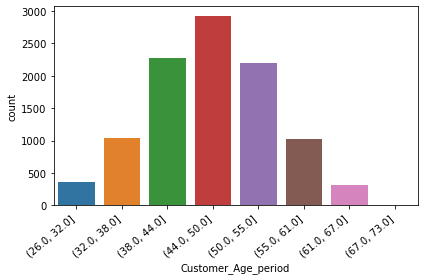

In [64]:
ax = sns.countplot(x="Customer_Age_period", data=customer_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

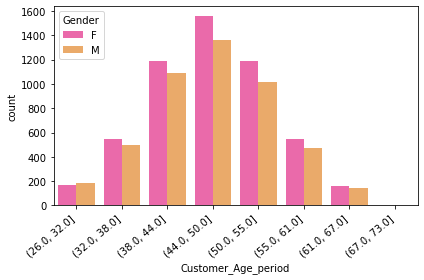

In [31]:
ax = sns.countplot(x="Customer_Age_period", hue='Gender', data=customer_data, palette="spring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

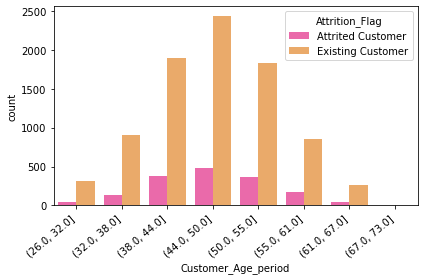

In [67]:
ax = sns.countplot(x="Customer_Age_period", hue='Attrition_Flag', data=customer_data, palette="spring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

I will perform the same procedure in `Months_on_book` feature because it has 44 distinct value. 

Number of unique values for 'Months_on_book' feature: 44


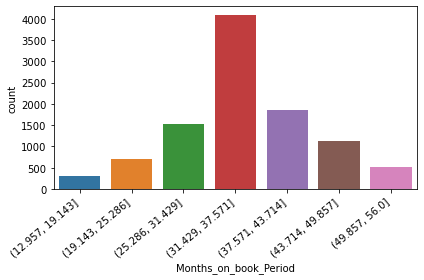

In [33]:
print(f"Number of unique values for 'Months_on_book' feature: {customer_data['Months_on_book'].nunique()}")
customer_data['Months_on_book_Period'] = pd.cut(customer_data['Months_on_book'],
                                                bins=int(customer_data['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", data=customer_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Number of unique values for 'Months_on_book' feature: 44


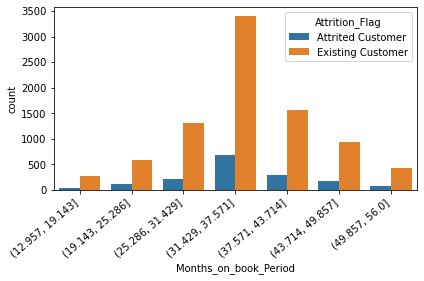

In [68]:
print(f"Number of unique values for 'Months_on_book' feature: {customer_data['Months_on_book'].nunique()}")
customer_data['Months_on_book_Period'] = pd.cut(customer_data['Months_on_book'],
                                                bins=int(customer_data['Months_on_book'].std()))
ax = sns.countplot(x="Months_on_book_Period", hue='Attrition_Flag', data=customer_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

Refresh *cat_cols, float64_cols*. All *int64_cols* are update to be ordinal values and *category* type

In [35]:
# list of features name that are int64, object, and float64
s = (customer_data.dtypes == 'int64')
int64_cols = list(s[s].index)
print(f"{len(int64_cols)} int64 features:\n{int64_cols}")

s = (customer_data.dtypes == 'category')
cat_cols = list(s[s].index)
print(f"\n{len(cat_cols)} Categorical features:\n{cat_cols}")

s = (customer_data.dtypes == 'float64')
float64_cols = list(s[s].index)
print(f"\n{len(float64_cols)} float64 features:\n{float64_cols}")
del s

9 int64 features:
['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt', 'Total_Trans_Ct']

7 Categorical features:
['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_period', 'Months_on_book_Period']

3 float64 features:
['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']


### Correlation ###
I would like to see which feature are correlated in some way to the target. Since correlation works only on numerical type, I will encode all catgeorical values in the categorical features to numbers using [pandas.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html). Once done I will show that we need a different approach to see correlation since most of our data is categorical.   

In [36]:
cat_df = customer_data[cat_cols].apply(lambda x : pd.factorize(x)[0])
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Gender                 10127 non-null  int64
 1   Education_Level        10127 non-null  int64
 2   Marital_Status         10127 non-null  int64
 3   Income_Category        10127 non-null  int64
 4   Card_Category          10127 non-null  int64
 5   Customer_Age_period    10127 non-null  int64
 6   Months_on_book_Period  10127 non-null  int64
dtypes: int64(7)
memory usage: 553.9 KB


Now, i would like to concatinate the cat_df with `int64` features

In [37]:
concat_df = pd.concat([cat_df, customer_data[int64_cols]], axis=1)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Gender                    10127 non-null  int64
 1   Education_Level           10127 non-null  int64
 2   Marital_Status            10127 non-null  int64
 3   Income_Category           10127 non-null  int64
 4   Card_Category             10127 non-null  int64
 5   Customer_Age_period       10127 non-null  int64
 6   Months_on_book_Period     10127 non-null  int64
 7   Customer_Age              10127 non-null  int64
 8   Dependent_count           10127 non-null  int64
 9   Months_on_book            10127 non-null  int64
 10  Total_Relationship_Count  10127 non-null  int64
 11  Months_Inactive_12_mon    10127 non-null  int64
 12  Contacts_Count_12_mon     10127 non-null  int64
 13  Total_Revolving_Bal       10127 non-null  int64
 14  Total_Trans_Amt           10127 non-nu

<AxesSubplot:>

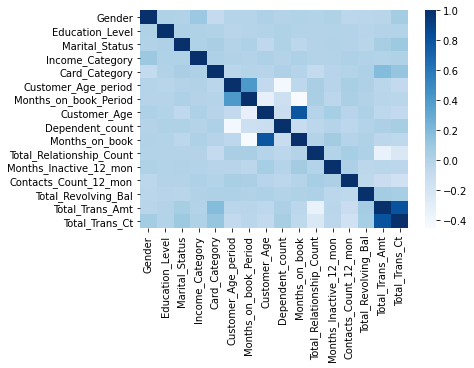

In [38]:
sns.heatmap(concat_df.corr(), cmap='Blues')

# Hypothesis

Examining Attrition_Age with other feature doesn’t show us any correlation. 

However, by using [Chi-square test](https://www.ling.upenn.edu/~clight/chisquared.htm) we can see that some features are dependent with the target. I will use [chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) (more information about chi2 can be found [here](https://machinelearningmastery.com/chi-squared-test-for-machine-learning/)) to compute chi2 and to get p-values. p-value is the Probability of H0 being True. 

If p-value > 0.05 then accept the assumption(H0). The assumption H0 is our case will be independence.

In [39]:
len(concat_df.columns)

16

In [40]:
from scipy.stats import chi2_contingency
factors_paired = [(i,j) for i in concat_df.columns.values for j in concat_df.columns.values] 

chi2, p_values =[], []

for f in factors_paired:
    if f[0] != f[1]:
        chitest = chi2_contingency(pd.crosstab(concat_df[f[0]], concat_df[f[1]]))   
        chi2.append(chitest[0])
        p_values.append(chitest[1])
    else:      # for same factor pair
        chi2.append(0)
        p_values.append(0)
n_features = len(concat_df.columns)
chi2 = np.array(chi2).reshape((n_features, n_features)) # shape it as a matrix
chi2 = pd.DataFrame(chi2, index=concat_df.columns.values, columns=concat_df.columns.values) # then a df for convenience
# p values is what will help us to decide dependency or independency
p_values = np.array(p_values).reshape((n_features, n_features))
p_values = pd.DataFrame(p_values, index=concat_df.columns.values, columns=concat_df.columns.values)

In [41]:
p_values.head()

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age_period,Months_on_book_Period,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Gender,0.000000e+00,0.294979,0.275238,0.000000e+00,3.604858e-16,1.646596e-01,7.247254e-01,2.743267e-01,5.892609e-01,7.214150e-01,4.933136e-01,0.144431,2.576879e-07,0.631900,5.340260e-05,1.231593e-34
Education_Level,2.949785e-01,0.000000,0.254514,3.655347e-02,4.803408e-01,4.549389e-04,3.851147e-01,8.155788e-02,4.647014e-01,4.482955e-01,5.037677e-01,0.792384,9.960346e-01,0.730030,7.041956e-01,7.942810e-01
Marital_Status,2.752383e-01,0.254514,0.000000,3.107848e-01,1.804597e-04,3.049967e-35,2.499087e-08,4.367050e-33,1.098223e-06,2.613670e-04,1.391759e-02,0.356316,3.590232e-01,0.980538,2.560844e-02,7.644927e-21
Income_Category,0.000000e+00,0.036553,0.310785,0.000000e+00,1.210687e-14,5.030799e-48,3.822821e-10,1.209849e-32,2.360305e-14,7.162656e-09,3.224772e-01,0.043922,8.151353e-02,0.218130,6.623665e-04,2.364812e-07
Card_Category,3.604858e-16,0.480341,0.000180,1.210687e-14,0.000000e+00,4.651855e-03,4.493012e-01,5.615201e-02,5.753035e-02,8.695887e-01,1.601259e-24,0.654858,2.736751e-01,0.002079,4.333935e-231,2.720540e-60


/var/folders/vp/k70yvwj57vd00y1yn6zl3mkr0000gn/T/ipykernel_48959/1454337231.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(p_values, dtype=np.bool))


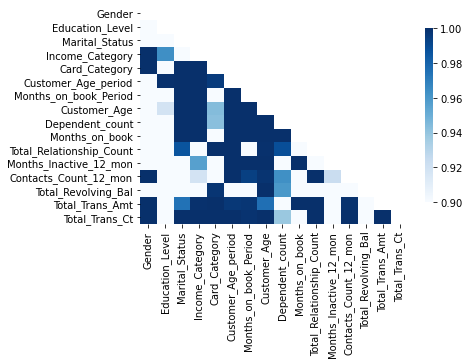

In [42]:
mask = np.triu(np.ones_like(p_values, dtype=np.bool))
sns.heatmap(1 - p_values, mask=mask, fmt=".2f", cmap='Blues',
           vmin=0.9, vmax=1, cbar_kws={"shrink": .8})

plt.yticks(rotation=0)
plt.show()

In [43]:
1 - p_values

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age_period,Months_on_book_Period,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Revolving_Bal,Total_Trans_Amt,Total_Trans_Ct
Gender,1.000000,0.705021,0.724762,1.000000,1.000000,0.835340,0.275275,0.725673,0.410739,0.278585,0.506686,0.855569,1.000000,0.368100,0.999947,1.000000
Education_Level,0.705021,1.000000,0.745486,0.963447,0.519659,0.999545,0.614885,0.918442,0.535299,0.551704,0.496232,0.207616,0.003965,0.269970,0.295804,0.205719
Marital_Status,0.724762,0.745486,1.000000,0.689215,0.999820,1.000000,1.000000,1.000000,0.999999,0.999739,0.986082,0.643684,0.640977,0.019462,0.974392,1.000000
Income_Category,1.000000,0.963447,0.689215,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.677523,0.956078,0.918486,0.781870,0.999338,1.000000
Card_Category,1.000000,0.519659,0.999820,1.000000,1.000000,0.995348,0.550699,0.943848,0.942470,0.130411,1.000000,0.345142,0.726325,0.997921,1.000000,1.000000
Customer_Age_period,0.835340,0.999545,1.000000,1.000000,0.995348,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.831365,0.996773,1.000000
Months_on_book_Period,0.275275,0.614885,1.000000,1.000000,0.550699,1.000000,1.000000,1.000000,1.000000,1.000000,0.859321,1.000000,0.993896,0.434101,0.997590,0.998611
Customer_Age,0.725673,0.918442,1.000000,1.000000,0.943848,1.000000,1.000000,1.000000,1.000000,1.000000,0.999234,1.000000,0.998321,1.000000,0.975677,1.000000
Dependent_count,0.410739,0.535299,0.999999,1.000000,0.942470,1.000000,1.000000,1.000000,1.000000,1.000000,0.988428,0.227206,0.963174,0.959877,0.811796,0.938472
Months_on_book,0.278585,0.551704,0.999739,1.000000,0.130411,1.000000,1.000000,1.000000,1.000000,1.000000,0.745552,1.000000,0.881049,0.094035,1.000000,0.550237


In the table and heatmap above we can see that there is a dependency likelihood between `Attrition_Flag` and some of the other features. The table above is 1-p_value, so the closer to 1 the greater liklihood for dependency. 

For example, `Customer_Age` has 0.979 likelihood to be dependent with *Target* whereas `Customer_Age_period` has only 0.95, therefore I will use `Customer_Age` and discard `Customer_Age_period` that I've created previously. `Gender` and the five last features has a bigger likelihood for being dependent with `Attrition_Flag`


In [44]:
customer_data.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000
